# 딥러닝 학습 기술


## IMDB 딥러닝 모델 예제

* 영화 사이트 IMDB의 리뷰 데이터
* 텍스트 분류, 감성 분류를 위해 자주 사용하는 데이터
* 리뷰 텍스트와 리뷰가 긍정인 경우 1을 부정인 경우 0으로 표시한 레이블
* 케라스에서는 IMDB 영화 리뷰 데이터를 `imdb.load_data()` 함수를 통해 다운로드 가능

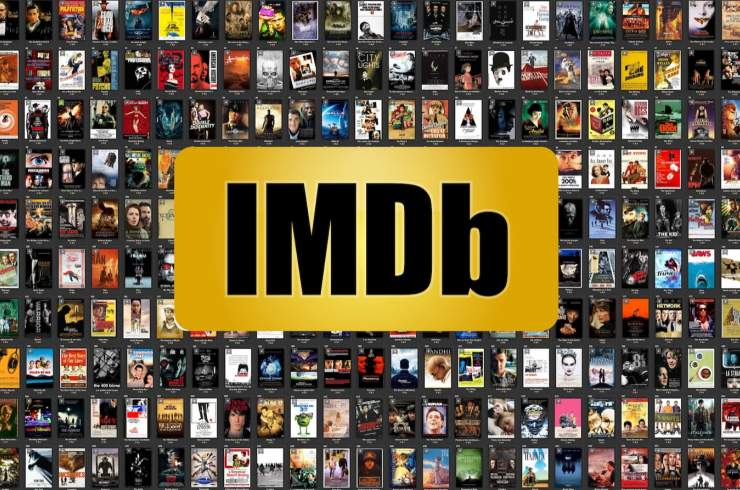

In [ ]:
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_seq(seqs, dim=10000):
    results = np.zeros((len(seqs), dim))
    for i, seq in enumerate(seqs):
        results[i, seq] = 1
        
    return results

x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(16, activation='relu', input_shape=(10000, ), name='dense1'),
    Dense(16, activation='relu', name='hidden'),
    Dense(1, activation='sigmoid', name='output')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              (None, 16)                160016    
                                                                 
 hidden (Dense)              (None, 16)                272       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_hist = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 1s 25ms/step - loss: 0.4564 - acc: 0.8112 - val_loss: 0.3369 - val_acc: 0.8803
Epoch 2/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2677 - acc: 0.9036 - val_loss: 0.3192 - val_acc: 0.8691
Epoch 3/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2093 - acc: 0.9239 - val_loss: 0.2778 - val_acc: 0.8897
Epoch 4/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1786 - acc: 0.9368 - val_loss: 0.2889 - val_acc: 0.8858
Epoch 5/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1563 - acc: 0.9439 - val_loss: 0.3836 - val_acc: 0.8538
Epoch 6/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1384 - acc: 0.9515 - val_loss: 0.3166 - val_acc: 0.8794
Epoch 7/20
49/49 [==============================] - 1s 14ms/step - loss: 0.1258 - acc: 0.9555 - val_loss: 0.3342 - val_acc: 0.8767
Epoch 8/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1139 - a

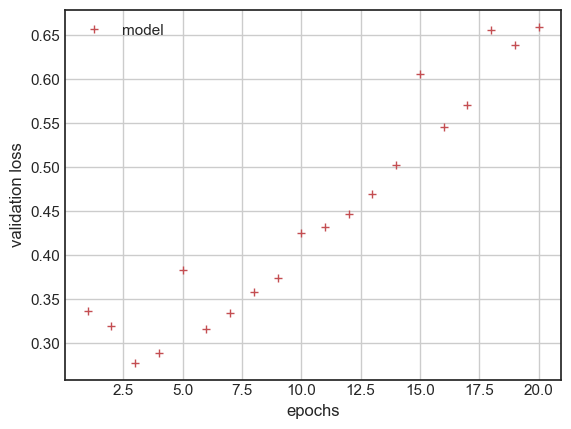

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

epochs = range(1, 21)
model_val_loss = model_hist.history['val_loss']

plt.plot(epochs, model_val_loss, 'r+', label='model')
plt.xlabel('epochs')
plt.ylabel('validation loss')
plt.legend()
plt.grid()
plt.show()

## 과소적합(Underfitting) / 과대적합(Overfitting)

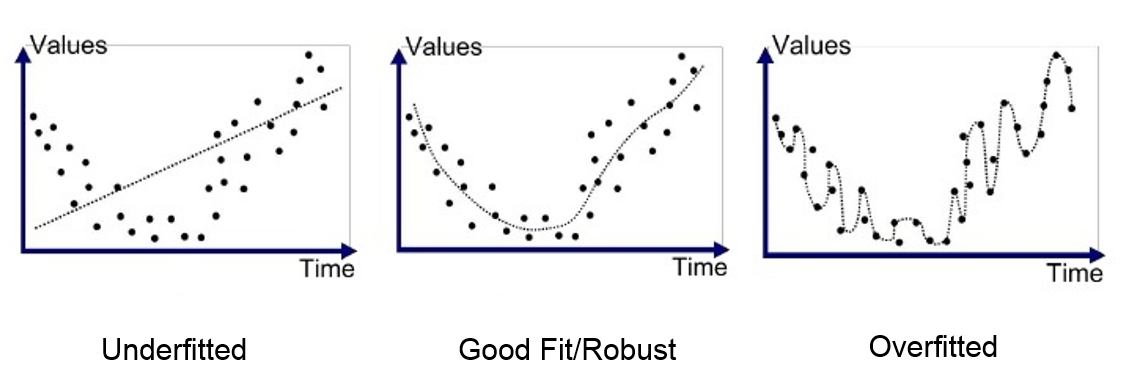

### 과소적합 (Underfitting)

- 학습 데이터를 충분히 학습하지 않아 성능이 매우 안 좋은 경우
- 모델이 지나치게 단순한 경우
- 해결 방안
  - 충분한 학습 데이터 수집
  - 보다 더 복잡한 모델 사용
  - 에폭수(epochs)를 늘려 충분히 학습

### 과대적합 (Overfitting)

- 모델이 학습 데이터에 지나치게 맞추어진 상태
- 새로운 데이터에서는 성능 저하
- 데이터에는 잡음이나 오류가 포함
- 학습 데이터가 매우 적을 경우
- 모델이 지나치게 복잡한 경우 
- 학습 횟수가 매우 많을 경우
- 해결방안
  - 다양한 학습 데이터 수집 및 학습
  - 모델 단순화: 파라미터가 적은 모델을 선택하거나, 학습 데이터의 특성 수를 줄임
  - 정규화(Regularization)을 통한 규칙 단순화
  - 적정한 하이퍼 파라미터 찾기

### 과대적합(overfitting)과 과소적합(underfitting) 방지 방법

* 모델의 크기 축소
* 가중치 초기화(Weight Initializer)
* 옵티마이저(Optimizer)
* 배치 정규화(Batch Normalization)
* 규제화(Regularization)
* 드롭아웃(Dropout)

## 모델 크기 조절

- 가장 단순한 방법
- 모델의 크기를 줄인다는 것은 학습 파라미터의 수를 줄이는 것


### 모델 크기 감소

In [ ]:
model_s = Sequential([
    Dense(16, activation='relu', input_shape=(10000, ), name='dense1'),
    Dense(16, activation='relu', name='hidden'),
    Dense(1, activation='sigmoid', name='output')])
    
    
model_s.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model_s.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              (None, 16)                160016    
                                                                 
 hidden (Dense)              (None, 16)                272       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_s_hist = model_s.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 26ms/step - loss: 0.4822 - acc: 0.8102 - val_loss: 0.3573 - val_acc: 0.8737
Epoch 2/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2777 - acc: 0.9010 - val_loss: 0.3125 - val_acc: 0.8729
Epoch 3/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2150 - acc: 0.9216 - val_loss: 0.2784 - val_acc: 0.8893
Epoch 4/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1845 - acc: 0.9342 - val_loss: 0.2929 - val_acc: 0.8834
Epoch 5/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1617 - acc: 0.9423 - val_loss: 0.3475 - val_acc: 0.8659
Epoch 6/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1423 - acc: 0.9502 - val_loss: 0.3126 - val_acc: 0.8800
Epoch 7/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1309 - acc: 0.9539 - val_loss: 0.3302 - val_acc: 0.8762
Epoch 8/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1191 - a

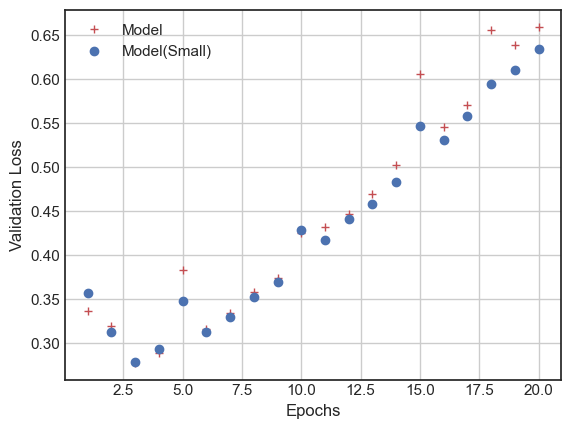

In [ ]:
model_s_val_loss = model_s_hist.history['val_loss']

plt.plot(epochs, model_val_loss, 'r+', label='Model')
plt.plot(epochs, model_s_val_loss, 'bo' , label='Model(Small)')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

### 모델 크기 증가

In [ ]:
model_b = Sequential([Dense(1024, activation='relu', input_shape=(10000, ), name='input3'),
                    Dense(1024, activation='relu', name='hidden3'),
                    Dense(1, activation='sigmoid', name='output3')])
model_b.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])
model_b.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input3 (Dense)              (None, 1024)              10241024  
                                                                 
 hidden3 (Dense)             (None, 1024)              1049600   
                                                                 
 output3 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 11,291,649
Trainable params: 11,291,649
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_b_hist = model_b.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 7s 130ms/step - loss: 0.5168 - acc: 0.7506 - val_loss: 0.3056 - val_acc: 0.8756
Epoch 2/20
49/49 [==============================] - 6s 116ms/step - loss: 0.2828 - acc: 0.8829 - val_loss: 0.3201 - val_acc: 0.8606
Epoch 3/20
49/49 [==============================] - 6s 121ms/step - loss: 0.2077 - acc: 0.9175 - val_loss: 0.3284 - val_acc: 0.8586
Epoch 4/20
49/49 [==============================] - 7s 138ms/step - loss: 0.1624 - acc: 0.9384 - val_loss: 0.3334 - val_acc: 0.8746
Epoch 5/20
49/49 [==============================] - 6s 121ms/step - loss: 0.1203 - acc: 0.9563 - val_loss: 0.3274 - val_acc: 0.8830
Epoch 6/20
49/49 [==============================] - 7s 146ms/step - loss: 0.0872 - acc: 0.9687 - val_loss: 0.3333 - val_acc: 0.8804
Epoch 7/20
49/49 [==============================] - 7s 140ms/step - loss: 0.0505 - acc: 0.9835 - val_loss: 0.4076 - val_acc: 0.8819
Epoch 8/20
49/49 [==============================] - 7s 144ms/step - loss: 0.

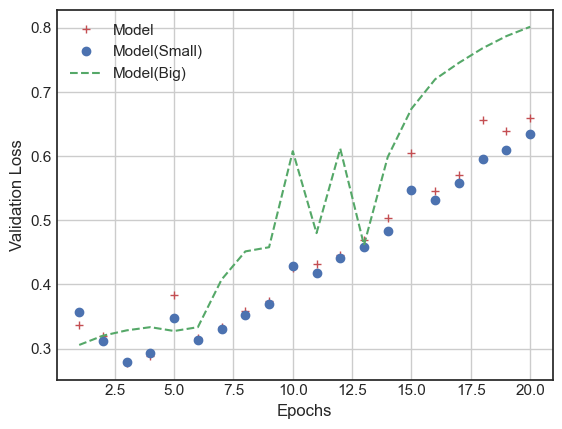

In [ ]:
model_b_val_loss = model_b_hist.history['val_loss']

plt.plot(epochs, model_val_loss, 'r+', label='Model')
plt.plot(epochs, model_s_val_loss, 'bo' , label='Model(Small)')
plt.plot(epochs, model_b_val_loss, 'g--' , label='Model(Big)')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

* 볼륨이 큰 신경망일수록 빠르게 훈련데이터 모델링 가능(학습 손실이 낮아짐)
* 과대 적합에는 더욱 민감해짐
* 이는 학습-검증 데이터 손실을 통해 확인 가능

## 옵티마이저(Optimizer)

### 확률적 경사하강법(Stochastic Gradient Descent, SGD)

* 전체를 한번에 계산하지 않고, **확률적**으로 일부 샘플을 뽑아 조금씩 나누어 학습을 시키는 과정  
* 반복할 때마다 다루는 데이터의 수가 적기때문에 한 번 처리하는 속도는 빠름  
* 한 번 학습할 때 필요한 메모리만 있으면 되므로 매우 큰 데이터셋에 대해서도 학습이 가능
* 확률적이기 때문에, 배치 경사하강법보다 불안정
* 손실함수의 최솟값에 이를 때까지 다소 위아래로 요동치면서 이동
* 따라서, 위와 같은 문제 때문에 **미니 배치 경사하강법**(mini-batch gradient descent)로 학습을 진행
* 요즘에는 보통 SGD라고하면 미니 배치 경사하강법을 의미하기도 함
* SGD의 단점: 단순하지만 문제에 따라서 시간이 매우 오래걸림
* SGD 수식

  $\quad W \leftarrow W - \gamma \frac{\partial L}{\partial W}$  
   - $\gamma :\ $ 학습률

  





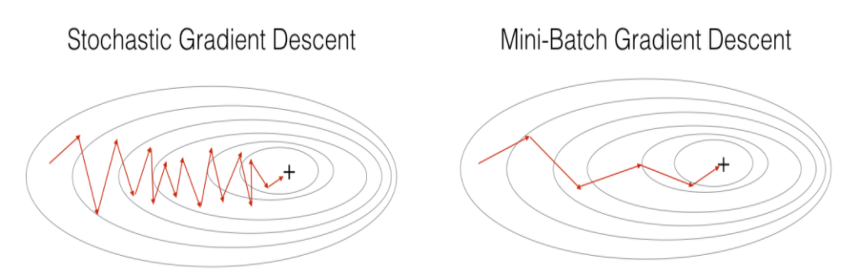

### Momentum

- 운동량을 의미, 관성과 관련
- 공이 그릇의 경사면을 따라서 내려가는 듯한 모습
- 이전의 속도를 유지하려는 성향
- 경사하강을 좀 더 유지하려는 성격을 지님
- 단순히 SGD만 사용하는 것보다 적게 방향이 변함
* Momentum 수식

  $
  \qquad v \ \leftarrow \ \alpha \ v - \gamma \ \frac{\partial L}{\partial W} \\
  \qquad W \ \leftarrow \ W \ + \ v
  $
  - $\alpha\ $ : 관성계수 
  - $v$ :  속도
  - $\gamma\ $ : 학습률
  - $\frac{\partial L}{\partial W}\ $ : 손실함수에 대한 미분




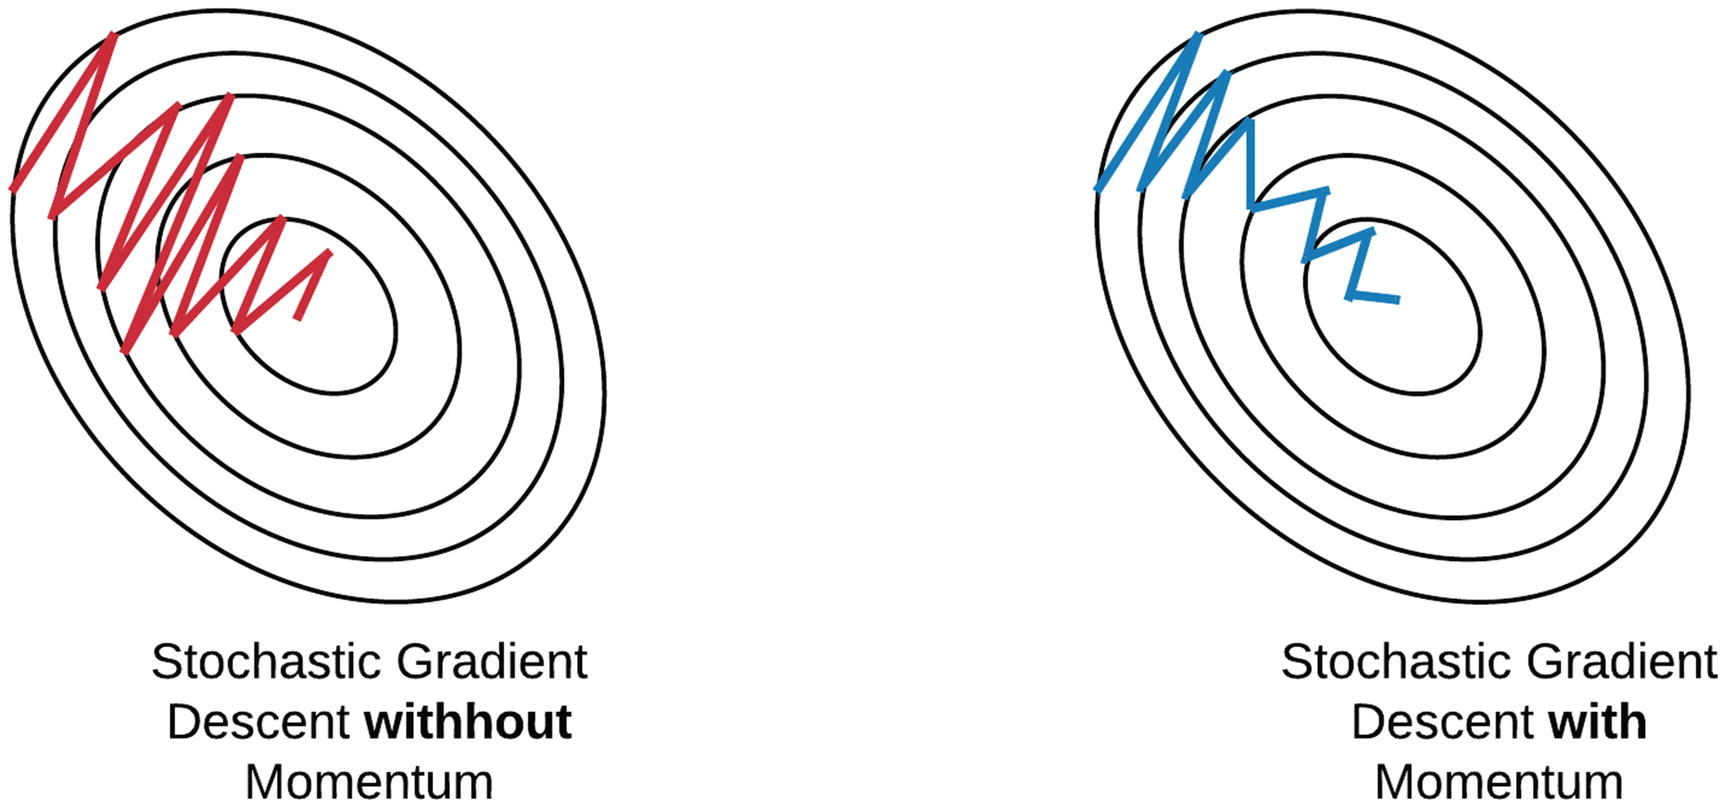

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

optimizer = SGD(learning_rate = 0.001, momentum=0.9)

### Nesterov

- 모멘텀의 방향으로 조금 앞선 곳에서 손실함수의 그라디언트를 구함
- 시간이 지날수록 조금 더 빨리 최솟값에 도달
- Nesterov 수식

  $
  \qquad m \ \leftarrow \  \beta m - \eta \bigtriangledown_\theta J(\theta + \beta m) \\
  \qquad \theta \ \leftarrow \ \theta \ + m
  $

  - $h\ $ : 기존 기울기를 제곱하여 더한 값
  - $\eta\ $ : 학습률
  - $\bigtriangledown_\theta J(\theta) \ $ : $\theta$에 대한 미분(그라디언트)

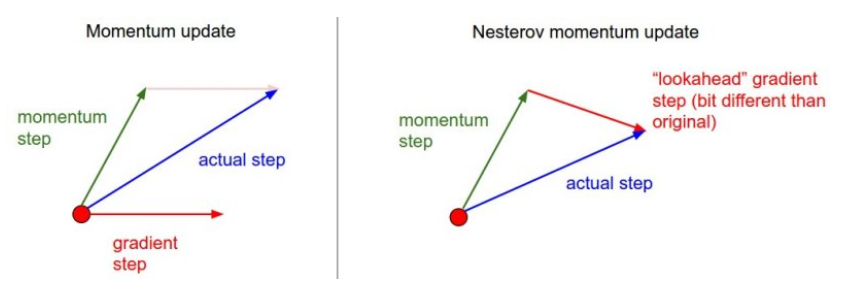

In [ ]:
optimizer = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

### AdaGrad(Adaptive Gradient)

- 가장 가파른 경사를 따라 빠르게 하강하는 방법
- 학습률을 변화시키며 진행하며 적응적 학습률이라고도 부름
- 경사가 급할 때는 빠르게 변화, 완만할 때는 느리게 변화
- 간단한 문제에서는 좋을 수는 있지만 딥러닝(Deep Learning)에서는 자주 쓰이지 않음
- 학습률이 너무 감소되어 전역최소값(global minimum)에 도달하기 전에 학습이 빨리 종료될 수 있기 때문
- AdaGrad 수식

  $
  \qquad h \ \leftarrow \  h + \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
  \qquad W \ \leftarrow \ W \ + \gamma \frac{1}{\sqrt h} \ \frac{\partial L}{\partial W}
  $
  - $h\ $ : 기존 기울기를 제곱하여 더한 값
  - $\gamma\ $ : 학습률
  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분
  - 과거의 기울기를 제곱하여 계속 더해하기 때문에 학습을 진행할수록 갱신 강도가 약해짐 ($\because \frac{1}{\sqrt h}$)    
  

In [ ]:
from tensorflow.keras.optimizers import Adagrad

optimizer = Adagrad(learning_rate=0.001)

### RMSProp (Root Mean Square Propagation)

- AdaGrad를 보완하기 위한 방법으로 등장
- 합 대신 지수의 평균값을 활용
- 학습이 안되기 시작하면 학습률이 커져서 잘 되게하고, 학습률이 너무 크면 학습률을 다시 줄임
- RMSProp 수식

  $
  \qquad h \ \leftarrow \  \rho \ h + (1 - \rho)\ \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
  \qquad W \ \leftarrow \ W \ + \gamma \frac{\partial L}{\partial W} / \ \sqrt{h + \epsilon}
  $
  - $h\ $ : 기존 기울기를 제곱하여 업데이트 계수를 곱한 값과 업데이트 계수를 곱한 값을 더해줌 
  - $\rho\ $ : 지수 평균의 업데이트 계수
  - $\gamma\ $ : 학습률
  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분

In [ ]:
from tensorflow.keras.optimizers import RMSprop

optimizer = RMSprop(learning_rate=0.001, rho=0.9)

### Adam (Adaptive Moment Estimation)

- 모멘텀 최적화와 RMSProp의 아이디어를 합친 것
- 지난 그래디언트의 지수 감소 평균을 따르고(Momentum), 지난 그레디언트 제곱의 지수 감소된 평균(RMSProp)을 따름
- 가장 많이 사용되는 최적화 방법
- Adam 수식

  $
  \qquad t \ \leftarrow \ t + 1 \\
  \qquad m_t \ \leftarrow \  \beta_1 \ m_{t-1} - (1 - \beta_1)\ \frac{\partial L}{\partial W}  \\
  \qquad v_t \ \leftarrow \ \beta_2 \ v_{t-1} + (1 - \beta_2) \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
  \qquad \hat{m_t} \ \leftarrow \frac{m_t}{1 - \beta_1^t} \\
  \qquad \hat{v_t} \ \leftarrow \frac{v_t}{1 - \beta_2^t} \\
  \qquad W_t \ \leftarrow \ W_{t-1} \ + \gamma \ \hat{m_t}\  / \sqrt{\hat{v_t} + \epsilon}
  $
  - $\beta\ $ : 지수 평균의 업데이트 계수
  - $\gamma\ $ : 학습률
  - $\beta_1 \approx 0.9\ ,\ \ \beta_2 \approx 0.999$
  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분

In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

### 최적화 Optimizer 비교

<img src="https://user-images.githubusercontent.com/11681225/50016682-39742a80-000d-11e9-81da-ab0406610b9c.gif" width="700">

<img src="https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile25.uf.tistory.com%2Fimage%2F222B4F4F562BD0330EA41C">

## 가중치 초기화(Weights Initialization)

* 가중치 초기화 시각화: https://www.deeplearning.ai/ai-notes/initialization/

### 가중치 소실(Gradient Vanishing)

- 활성화함수가 Sigmoid 함수 일 때, 은닉층의 갯수가 늘어 날수록 가중치가 역전파되면서 가중치 소실문제 발생
  - 0 ~ 1 사이의 값으로 출력되면서 0 또는 1에 가중치 값이 퍼짐  
    이는 <u>미분값이 점점 0에 가까워짐</u>을 의미하기도 함
  - **ReLU 함수 등장(비선형 함수)**

- 가중치 초기화 문제(은닉층의 활성화값 분포)
  - 가중치의 값이 일부 값으로 치우치게 되면, 활성화 함수를 통과한 값이 치우치게 되고, 표현할 수 있는 신경망의 수가 적어짐
  - 따라서, 활성화값이 골고루 분포되는 것이 중요

![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F278186%2Fd158ec3585bc1551d9f3a03ae13a3a73%2Fvanishing%20gradient%20problem.png?generation=1574233763365617&alt=media)

###  선형 함수에서 가중치 초기화

#### 초기값 : 0 (zeros)

- 학습이 올바르게 진행되지 않음
- 0으로 설정하면 오차역전파법에서 모든 가중치의 값이 똑같이 갱신됨

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i-1]
    
    w = np.zeros((nodes, nodes))
    a = np.dot(x, w)
    z = sigmoid(a)
    activation_values[i] = z

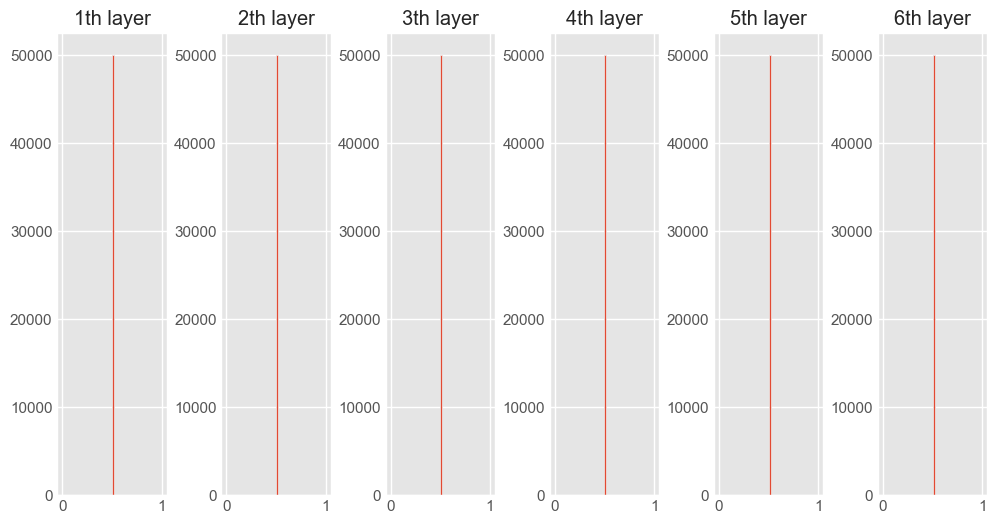

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(12, 6))
for i, a in activation_values.items():
    plt.subplot(1, len(activation_values), i+1)
    plt.title(str(i+1) + 'th layer')
    plt.hist(a.flatten(), 50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

#### 초기값 : 균일분포(Uniform)

- 활성화 값이 균일하지 않음(활성화함수 : sigmoid)
- 역전파로 전해지는 기울기값이 사라짐

In [ ]:
x = np.random.randn(1000, 50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i-1]
    
    w = np.random.uniform(1, 10, (nodes, nodes))
    a = np.dot(x, w)
    z = sigmoid(a)
    activation_values[i] = z

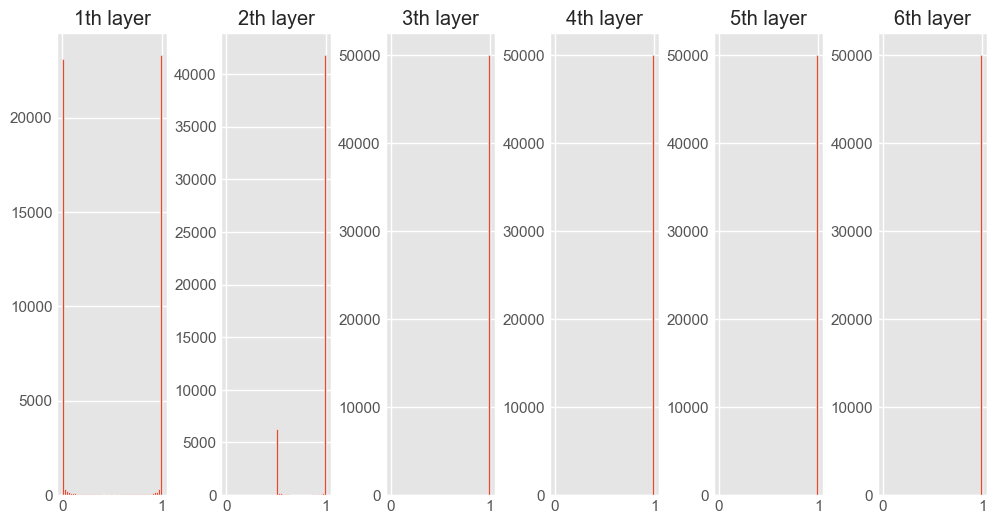

In [ ]:
plt.figure(figsize=(12, 6))
for i, a in activation_values.items():
    plt.subplot(1, len(activation_values), i+1)
    plt.title(str(i+1) + 'th layer')
    plt.hist(a.flatten(), 50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

#### 초기값 : 정규분포(nomalization)

- 활성화함수를 통과하면 양쪽으로 퍼짐
- 0과 1에 퍼지면서 기울기 소실문제(gradient vanishing) 발생

In [ ]:
x = np.random.randn(1000, 50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i-1]
    
    w = np.random.randn(nodes, nodes)
    a = np.dot(x, w)
    z = sigmoid(a)
    activation_values[i] = z

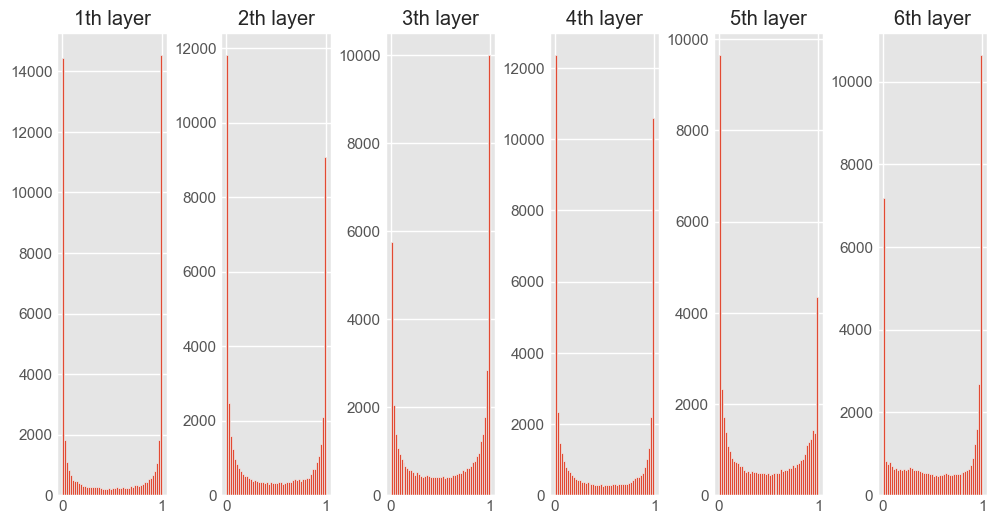

In [ ]:
plt.figure(figsize=(12, 6))
for i, a in activation_values.items():
    plt.subplot(1, len(activation_values), i+1)
    plt.title(str(i+1) + 'th layer')
    plt.hist(a.flatten(), 50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

* 아주 작은 정규분포값으로 가중치 초기화
  - 0과 1로 퍼치지는 않았고, 한 곳에 치우쳐 짐
  - 해당 신경망이 표현할 수 있는 문제가 제한됨

In [ ]:
x = np.random.randn(1000, 50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i-1]
    
    w = np.random.randn(nodes, nodes) * 0.01
    a = np.dot(x, w)
    z = sigmoid(a)
    activation_values[i] = z

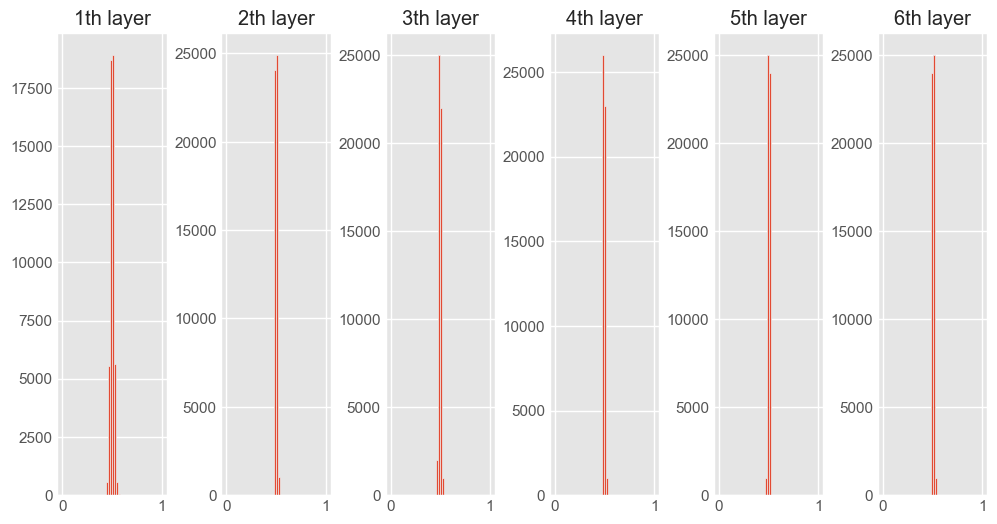

In [ ]:
plt.figure(figsize=(12, 6))
for i, a in activation_values.items():
    plt.subplot(1, len(activation_values), i+1)
    plt.title(str(i+1) + 'th layer')
    plt.hist(a.flatten(), 50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

#### 초기값 : Xavier (Glorot)

- 은닉층의 노드의 수가 n이라면 표준편차가 $\frac{1}{\sqrt{n}}$인 분포
- 더 많은 가중치에 역전파가 전달 가능하고, 비교적 많은 문제를 표현할 수 있음
- 활성화 함수가 **선형**인 함수일 때 매우 적합

In [ ]:
x = np.random.randn(1000, 50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i-1]
    
    w = np.random.randn(nodes, nodes) / np.sqrt(nodes)
    a = np.dot(x, w)
    z = sigmoid(a)
    activation_values[i] = z

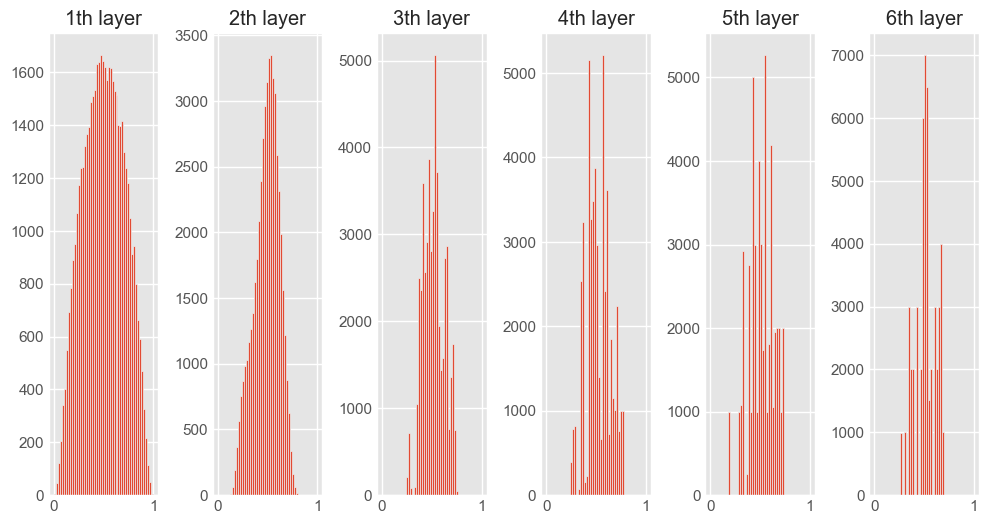

In [ ]:
plt.figure(figsize=(12, 6))
for i, a in activation_values.items():
    plt.subplot(1, len(activation_values), i+1)
    plt.title(str(i+1) + 'th layer')
    plt.hist(a.flatten(), 50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

#### 초기값 : Xavier (Glorot) - tanh

- 활성화 함수: tanh
- sigmoid 함수보다 더 깔끔한 종모양으로 분포  


In [ ]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

x = np.random.randn(1000, 50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i-1]
    
    w = np.random.randn(nodes, nodes) / np.sqrt(nodes)
    a = np.dot(x, w)
    z = tanh(a)
    activation_values[i] = z

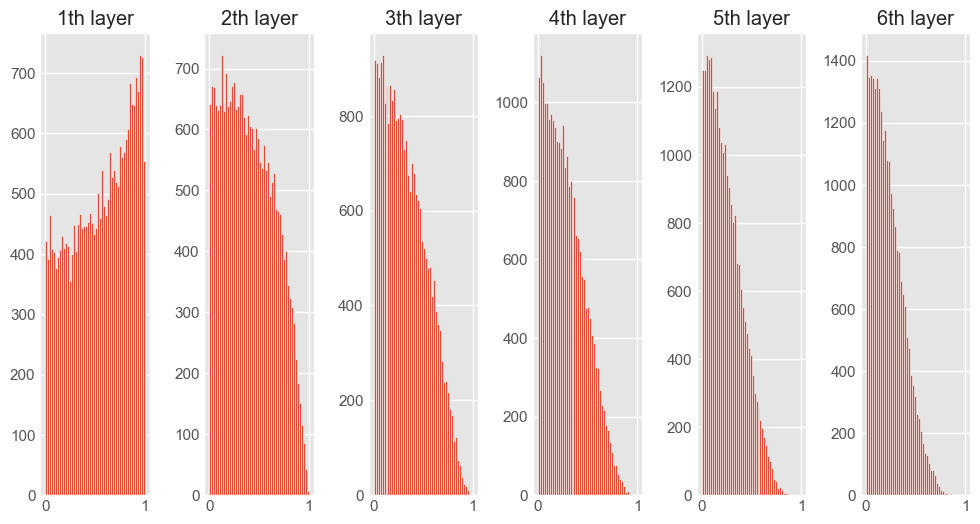

In [ ]:
plt.figure(figsize=(12, 6))
for i, a in activation_values.items():
    plt.subplot(1, len(activation_values), i+1)
    plt.title(str(i+1) + 'th layer')
    plt.hist(a.flatten(), 50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

### 비선형 함수에서의 가중치 초기화

#### 초기값: 0 (Zeros)

- 활성화함수: ReLU

In [ ]:
def ReLU(x):
    return np.maximum(0, x)

x = np.random.randn(1000, 50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i-1]
    
    w = np.zeros((nodes, nodes))
    a = np.dot(x, w)
    z = ReLU(a)
    activation_values[i] = z

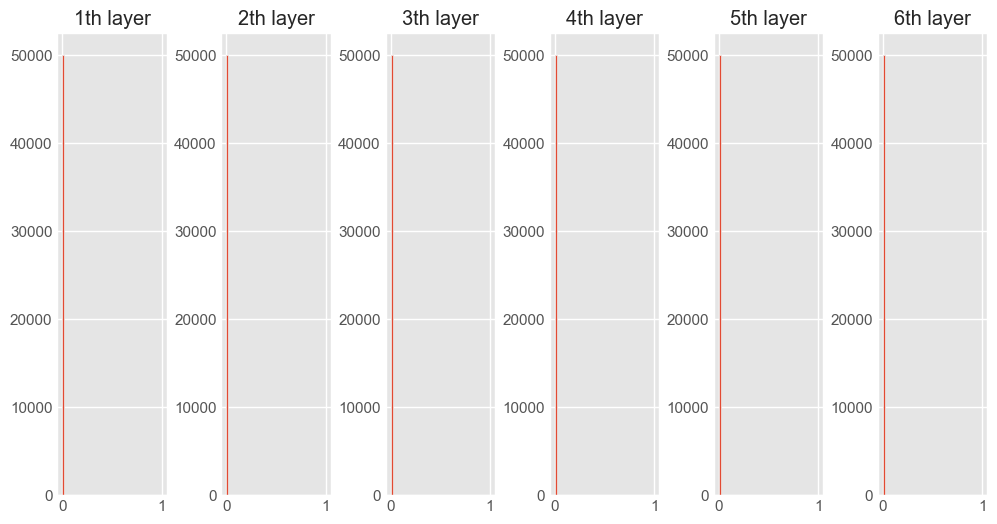

In [ ]:
plt.figure(figsize=(12, 6))
for i, a in activation_values.items():
    plt.subplot(1, len(activation_values), i+1)
    plt.title(str(i+1) + 'th layer')
    plt.hist(a.flatten(), 50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

#### 초기값: 정규분포(Nomalization)

- 활성화함수 : ReLU

In [ ]:
x = np.random.randn(1000, 50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i-1]
    
    w = np.random.randn(nodes, nodes)
    a = np.dot(x, w)
    z = ReLU(a)
    activation_values[i] = z

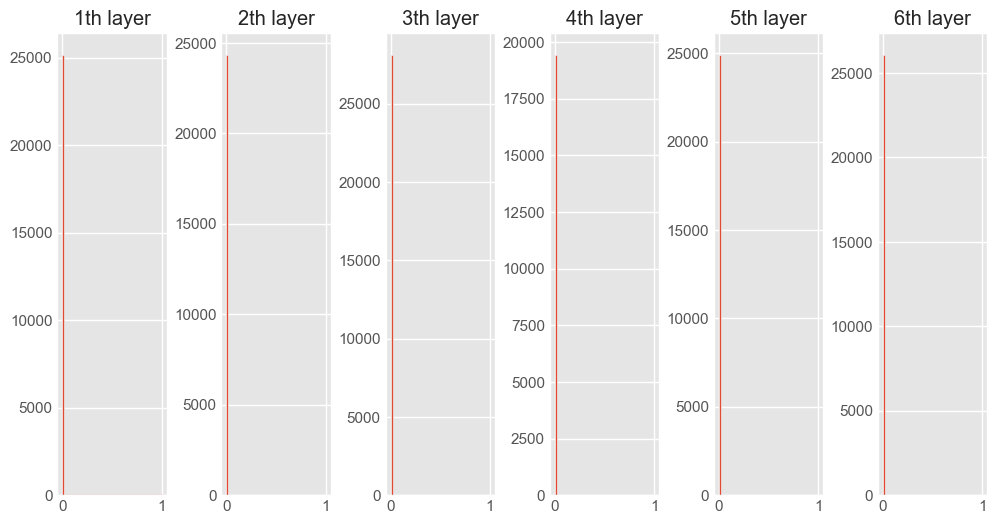

In [ ]:
plt.figure(figsize=(12, 6))
for i, a in activation_values.items():
    plt.subplot(1, len(activation_values), i+1)
    plt.title(str(i+1) + 'th layer')
    plt.hist(a.flatten(), 50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

* 표준편차: 0.01

In [ ]:
x = np.random.randn(1000, 50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i-1]
    
    w = np.random.randn(nodes, nodes) * 0.01
    a = np.dot(x, w)
    z = ReLU(a)
    activation_values[i] = z

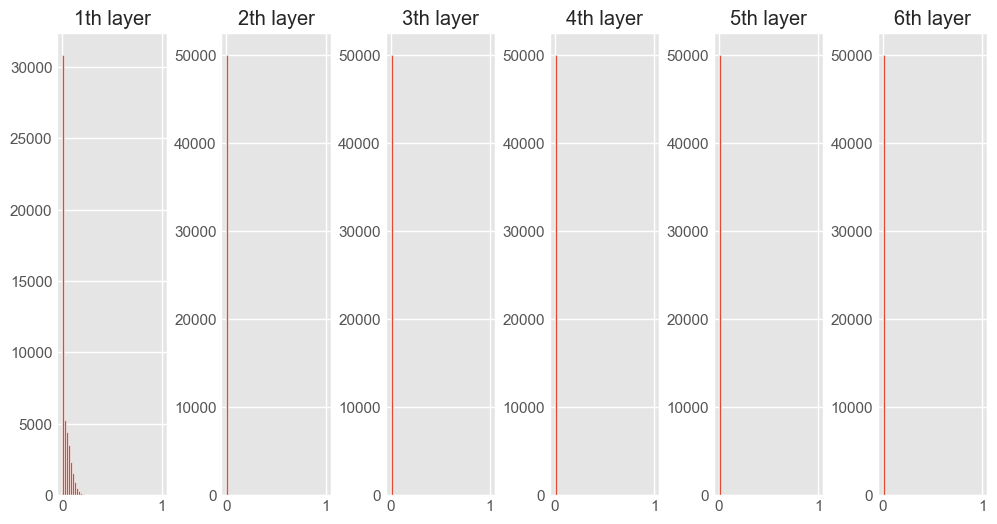

In [ ]:
plt.figure(figsize=(12, 6))
for i, a in activation_values.items():
    plt.subplot(1, len(activation_values), i+1)
    plt.title(str(i+1) + 'th layer')
    plt.hist(a.flatten(), 50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

#### 초기값 : Xavier (Glorot)

In [ ]:
x = np.random.randn(1000, 50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i-1]
    
    w = np.random.randn(nodes, nodes) / np.sqrt(nodes)
    a = np.dot(x, w)
    z = ReLU(a)
    activation_values[i] = z

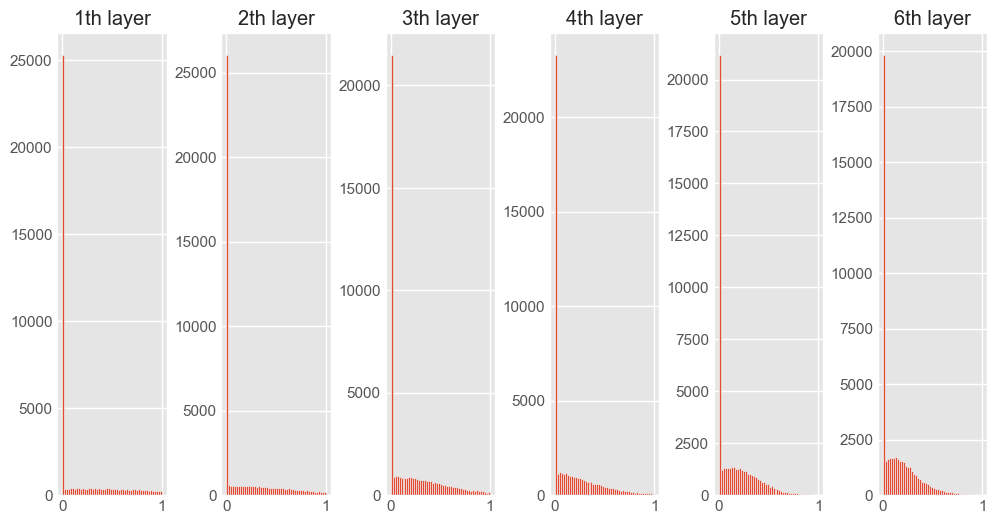

In [ ]:
plt.figure(figsize=(12, 6))
for i, a in activation_values.items():
    plt.subplot(1, len(activation_values), i+1)
    plt.title(str(i+1) + 'th layer')
    plt.hist(a.flatten(), 50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

#### 초기값 : He

- 표준편차가 $\sqrt{\frac{2}{n}}$인 분포
- 활성화값 분포가 균일하게 분포되어 있음
- 활성화함수가 ReLU와 같은 **비선형**함수 일 때 더 적합하다고 알려진 분포

In [ ]:
x = np.random.randn(1000, 50)
nodes = 50
hidden_layers = 6
activation_values = {}

for i in range(hidden_layers):
    if i != 0:
        x = activation_values[i-1]
    
    w = np.random.randn(nodes, nodes) * np.sqrt(2 / nodes)
    a = np.dot(x, w)
    z = ReLU(a)
    activation_values[i] = z

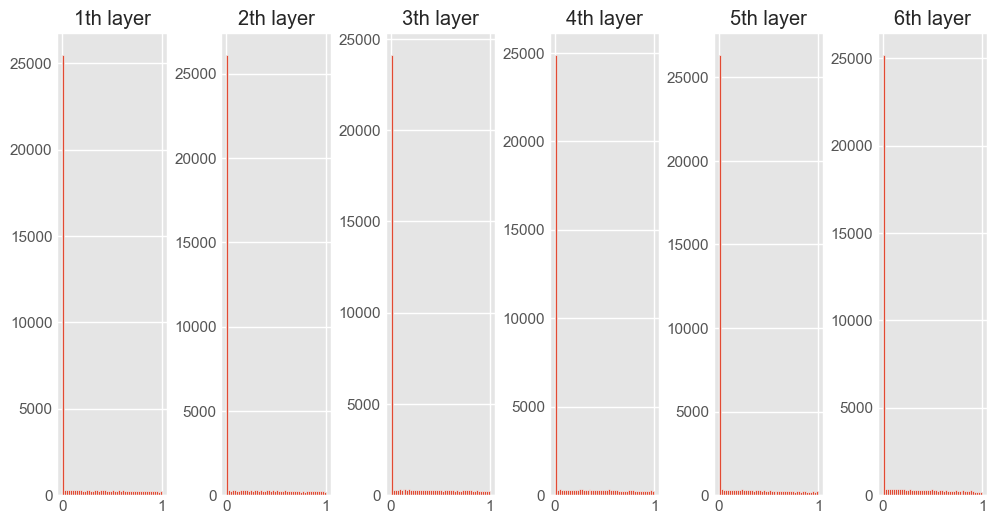

In [ ]:
plt.figure(figsize=(12, 6))
for i, a in activation_values.items():
    plt.subplot(1, len(activation_values), i+1)
    plt.title(str(i+1) + 'th layer')
    plt.hist(a.flatten(), 50, range=(0, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

### 초기화 전략

- Glorot Initialization (Xavier)
  - 활성화 함수  
    - 없음
    - tanh
    - sigmoid
    - softmax

- He Initialization 
  - 활성화 함수  
    - ReLU
    - LeakyReLU
    - ELU 등

    

In [ ]:
from tensorflow.keras.layers import Dense, LeakyReLU, Activation
from tensorflow.keras.models import Sequential

model = Sequential([Dense(30, kernel_initializer='he_normal', input_shape=[10, 10]),
                    LeakyReLU(alpha=0.2),
                    Dense(1, kernel_initializer='he_normal'),
                    Activation('softmax')])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10, 30)            330       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 10, 30)            0         
                                                                 
 dense_21 (Dense)            (None, 10, 1)             31        
                                                                 
 activation_1 (Activation)   (None, 10, 1)             0         
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


## 배치 정규화 (Batch Normalization)

- 모델에 주입되는 샘플들을 균일하게 만드는 방법
- 가중치의 활성화값이 적당히 퍼지게끔 '강제'로 적용시키는 것
- 미니배치 단위로 데이터의 평균이 0, 표준편차가 1로 정규화
- 학습을 빨리 진행할 수 있음
- 학습 후 새로운 데이터에 잘 일반화 할 수 있도록 도와줌
- 초기값에 크게 의존하지 않아도 됨
- 과대적합 방지
- 데이터 전처리 단계에서 진행해도 되지만 정규화가 되어서 layer에 들어갔다는 보장이 없음
- 주로 **Dense** 또는 **Conv2D** Layer 후, **활성화 함수**이전에 놓임

![](https://www.jeremyjordan.me/content/images/2018/01/Screen-Shot-2018-01-23-at-2.27.20-PM.png)

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dense, Activation
from tensorflow.keras.utils import plot_model

model = Sequential()

model.add(Dense(32, input_shape=(28 * 28, ), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 32)                25120     
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 32)                0         
                                                                 
Total params: 25,248
Trainable params: 25,184
Non-trainable params: 64
_________________________________________________________________


## 규제화(Regularization) - 가중치 감소

- 과대적합(Overfitting, 오버피팅)을 방지하는 방법 중 하나
- 과대적합은 가중치의 매개변수 값이 커서 발생하는 경우가 많음  
  이를 방지하기 위해 **큰 가중치 값에 큰 규제를 가하는 것**
- 규제란 가중치의 절댓값을 가능한 작게 만드는 것으로, 가중치의 모든 원소를 0에 가깝게 하여 모든 특성이 출력에 주는 영향을 최소한으로 만드는 것(기울기를 작게 만드는 것)을 의미
- 가중치의 분포가 더 균일하게 됨
- 복잡한 네트워크 일수록 네트워크의 복잡도에 제한을 두어 가중치가 작은 값을 가지도록 함
- 규제란 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미
- 적절한 규제값을 찾는 것이 중요

- 네트워크 손실함수에 큰 가중치와 연관된 비용을 추가
  - L1 규제: 가중치의 절댓값에 비례하는 비용이 추가
  - L2 규제: 가중치의 제곱에 비례하는 비용이 추가(흔히 가중치 감쇠라고도 불림)
  - 위 두 규제가 합쳐진 경우도 존재


### L2 규제

- 가중치의 제곱합
- 손실 함수일정 값을 더함으로써 과적합을 방지
- $\lambda$ 값이 크면 가중치 감소가 커지고, 작으면 가하는 규제가 적어진다.
- 더 Robust한 모델을 생성하므로 L1보다 많이 사용됨

  $\qquad Cost = \frac{1}{n} \sum{^n}_{i=1} {L(y_i, \hat{y_i}) + \frac{\lambda}{2}w^2}$

  $\quad L(y_i, \hat{y_i})$ : 기존 Cost Function

In [ ]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

l2_model = Sequential([
    Dense(16, kernel_regularizer=l2(0.001), activation='relu', input_shape=(10000, )),
    Dense(16, kernel_regularizer=l2(0.001), activation='relu'),
    Dense(1, activation='sigmoid'),
])

l2_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

l2_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                160016    
                                                                 
 dense_25 (Dense)            (None, 16)                272       
                                                                 
 dense_26 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
l2_model_hist = l2_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 36ms/step - loss: 0.5405 - acc: 0.8004 - val_loss: 0.4138 - val_acc: 0.8745
Epoch 2/20
49/49 [==============================] - 1s 17ms/step - loss: 0.3422 - acc: 0.8977 - val_loss: 0.3628 - val_acc: 0.8736
Epoch 3/20
49/49 [==============================] - 1s 14ms/step - loss: 0.2831 - acc: 0.9150 - val_loss: 0.3293 - val_acc: 0.8892
Epoch 4/20
49/49 [==============================] - 1s 14ms/step - loss: 0.2581 - acc: 0.9252 - val_loss: 0.3608 - val_acc: 0.8732
Epoch 5/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2413 - acc: 0.9328 - val_loss: 0.3587 - val_acc: 0.8759
Epoch 6/20
49/49 [==============================] - 1s 14ms/step - loss: 0.2303 - acc: 0.9365 - val_loss: 0.3434 - val_acc: 0.8823
Epoch 7/20
49/49 [==============================] - 1s 13ms/step - loss: 0.2241 - acc: 0.9387 - val_loss: 0.3476 - val_acc: 0.8822
Epoch 8/20
49/49 [==============================] - 1s 14ms/step - loss: 0.2184 - a

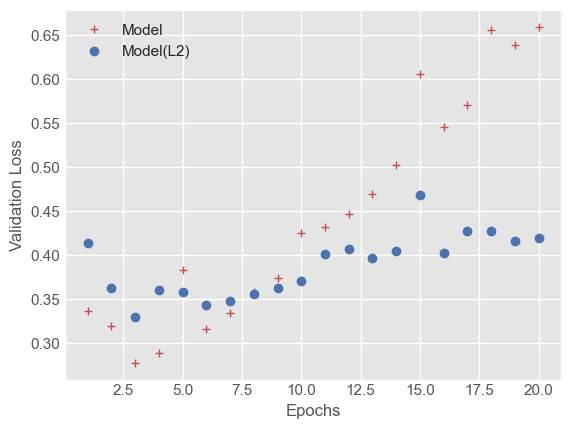

In [ ]:
l2_model_val_loss = l2_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_val_loss, 'r+', label='Model')
plt.plot(epochs, l2_model_val_loss, 'bo' , label='Model(L2)')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

### L1 규제

- 가중치의 절대값합
- L2 규제와 달리 어떤 가중치는 0이 되는데 이는 모델이 가벼워짐을 의미

  $\qquad Cost = \frac{1}{n} \sum{^n}_{i=1} {L(y_i, \hat{y_i}) + \frac{\lambda}{2}|w|}$

  $\quad L(y_i, \hat{y_i})$ : 기존 Cost Function

In [ ]:
l1_model = Sequential([
    Dense(16, kernel_regularizer=l1(0.0001), activation='relu', input_shape=(10000, )),
    Dense(16, kernel_regularizer=l1(0.0001), activation='relu'),
    Dense(1, activation='sigmoid'),
])

l1_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

l1_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 16)                160016    
                                                                 
 dense_28 (Dense)            (None, 16)                272       
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
l1_model_hist = l1_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 28ms/step - loss: 0.6785 - acc: 0.7393 - val_loss: 0.5011 - val_acc: 0.8696
Epoch 2/20
49/49 [==============================] - 1s 19ms/step - loss: 0.4099 - acc: 0.8868 - val_loss: 0.4001 - val_acc: 0.8685
Epoch 3/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3412 - acc: 0.8988 - val_loss: 0.3575 - val_acc: 0.8874
Epoch 4/20
49/49 [==============================] - 1s 15ms/step - loss: 0.3178 - acc: 0.9055 - val_loss: 0.3823 - val_acc: 0.8743
Epoch 5/20
49/49 [==============================] - 1s 15ms/step - loss: 0.3047 - acc: 0.9124 - val_loss: 0.3682 - val_acc: 0.8794
Epoch 6/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2959 - acc: 0.9168 - val_loss: 0.3584 - val_acc: 0.8850
Epoch 7/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2881 - acc: 0.9207 - val_loss: 0.3585 - val_acc: 0.8855
Epoch 8/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2846 - a

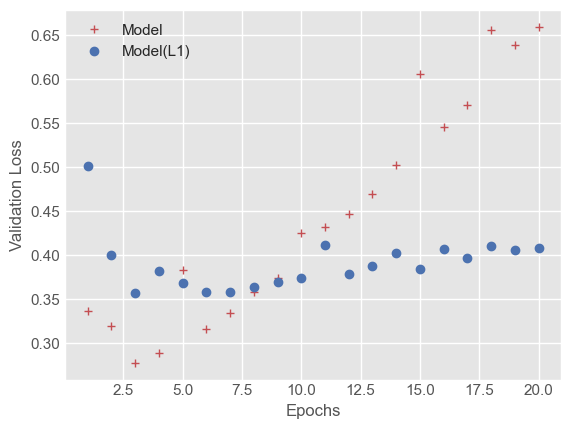

In [ ]:
l1_model_val_loss = l1_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_val_loss, 'r+', label='Model')
plt.plot(epochs, l1_model_val_loss, 'bo' , label='Model(L1)')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

### L1 L2 규제

In [ ]:
l1_l2_model = Sequential([
    Dense(16, kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001), activation='relu', input_shape=(10000, )),
    Dense(16, kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001), activation='relu'),
    Dense(1, activation='sigmoid'),
])

l1_l2_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

l1_l2_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 16)                160016    
                                                                 
 dense_31 (Dense)            (None, 16)                272       
                                                                 
 dense_32 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
l1_l2_model_hist = l1_l2_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 29ms/step - loss: 0.6298 - acc: 0.8027 - val_loss: 0.4612 - val_acc: 0.8730
Epoch 2/20
49/49 [==============================] - 1s 18ms/step - loss: 0.3820 - acc: 0.8935 - val_loss: 0.3956 - val_acc: 0.8698
Epoch 3/20
49/49 [==============================] - 1s 14ms/step - loss: 0.3252 - acc: 0.9054 - val_loss: 0.3516 - val_acc: 0.8890
Epoch 4/20
49/49 [==============================] - 1s 14ms/step - loss: 0.3058 - acc: 0.9120 - val_loss: 0.3803 - val_acc: 0.8752
Epoch 5/20
49/49 [==============================] - 1s 14ms/step - loss: 0.2931 - acc: 0.9173 - val_loss: 0.3685 - val_acc: 0.8790
Epoch 6/20
49/49 [==============================] - 1s 14ms/step - loss: 0.2848 - acc: 0.9208 - val_loss: 0.3572 - val_acc: 0.8847
Epoch 7/20
49/49 [==============================] - 1s 14ms/step - loss: 0.2800 - acc: 0.9244 - val_loss: 0.3583 - val_acc: 0.8852
Epoch 8/20
49/49 [==============================] - 1s 14ms/step - loss: 0.2753 - a

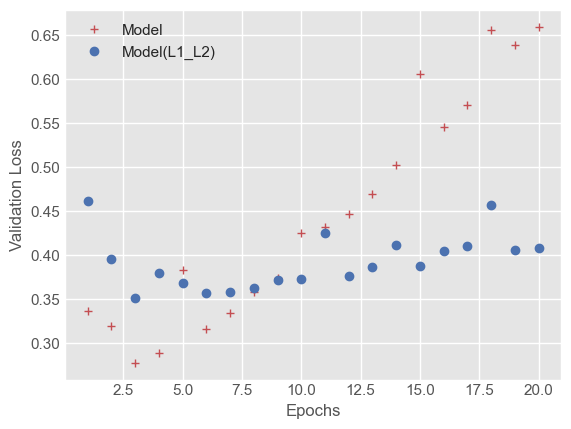

In [ ]:
l1_l2_model_val_loss = l1_l2_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_val_loss, 'r+', label='Model')
plt.plot(epochs, l1_l2_model_val_loss, 'bo' , label='Model(L1_L2)')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

* 규제 방법 비교

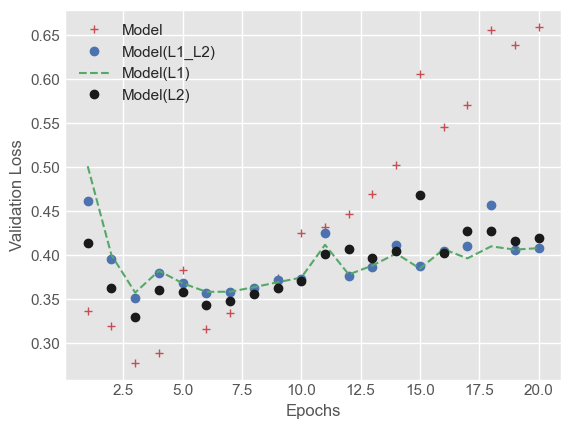

In [ ]:
epochs = range(1, 21)
plt.plot(epochs, model_val_loss, 'r+', label='Model')
plt.plot(epochs, l1_l2_model_val_loss, 'bo' , label='Model(L1_L2)')
plt.plot(epochs, l1_model_val_loss, 'g--' , label='Model(L1)')
plt.plot(epochs, l2_model_val_loss, 'ko' , label='Model(L2)')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

## 드롭아웃(Dropout)

- 신경망을 위해 사용되는 규제 기법 중 가장 효과적이고 널리 사용되는 방법
- 과적합을 방지하기 위한 방법
- 학습할 때 사용하는 노드의 수를 전체 노드 중에서 일부만을 사용
- 신경망의 레이어에 드롭아웃을 적용하면 훈련하는 동안 무작위로 층의 일부 특성(노드)를 제외
  - 예를 들어, [1.0, 3.2, 0.6, 0.8, 1.1] 라는 벡터에 대해 드롭아웃을 적용하면 **무작위로 0으로 바뀜** $\rightarrow$ [0, 3.2, 0.6, 0.8, 0]
  - 보통 0.2 ~ 0.5 사이의 비율로 지정됨
- 테스트 단계에서는 그 어떤 노드도 드롭아웃 되지 않고, 대신 해당 레이어의 출력 노드를 드롭아웃 비율에 맞게 줄여줌

  <img src="https://miro.medium.com/max/981/1*EinUlWw1n8vbcLyT0zx4gw.png" width="600">

In [ ]:
from tensorflow.keras.layers import Dropout

dropout_model = Sequential([
    Dense(16, activation='relu', input_shape=(10000, )),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid'),
])

dropout_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

dropout_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 16)                160016    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_37 (Dense)            (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_38 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dropout_model_hist = dropout_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 32ms/step - loss: 0.5870 - acc: 0.6951 - val_loss: 0.4412 - val_acc: 0.8651
Epoch 2/20
49/49 [==============================] - 1s 19ms/step - loss: 0.4352 - acc: 0.8243 - val_loss: 0.3403 - val_acc: 0.8788
Epoch 3/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3524 - acc: 0.8672 - val_loss: 0.2923 - val_acc: 0.8878
Epoch 4/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2979 - acc: 0.8912 - val_loss: 0.2793 - val_acc: 0.8882
Epoch 5/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2625 - acc: 0.9074 - val_loss: 0.2785 - val_acc: 0.8869
Epoch 6/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2282 - acc: 0.9200 - val_loss: 0.2868 - val_acc: 0.8835
Epoch 7/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2107 - acc: 0.9267 - val_loss: 0.3033 - val_acc: 0.8845
Epoch 8/20
49/49 [==============================] - 1s 15ms/step - loss: 0.1948 - a

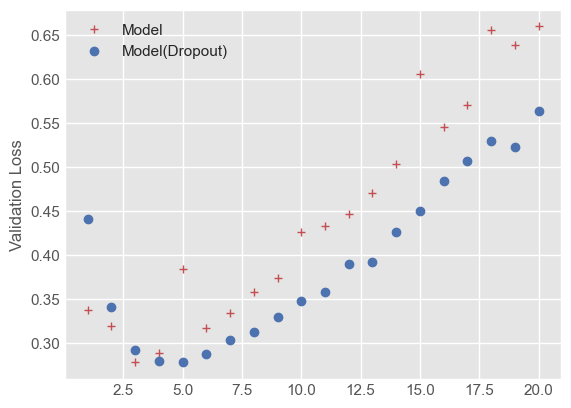

In [ ]:
dropout_model_val_loss = dropout_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_val_loss, 'r+', label='Model')
plt.plot(epochs, dropout_model_val_loss, 'bo' , label='Model(Dropout)')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

## 하이퍼 파라미터(Hyper Parameter)

- 사람이 직접 설정해야하는 매개변수
- 학습이 되기전 미리 설정되어 상수취급

### 학습률(Learning Rate)
- 학습률에 따라 학습정도가 달라짐
- 적절한 학습률을 찾는 것이 핵심

### 학습 횟수(Epochs)
- 학습 횟수를 너무 작게, 또는 너무 크게 지정하면 과소적합 또는 과대적합 발생
- 여러번 진행하면서 최적의 학습 횟수(epochs)값을 찾아야함

### 미니배치 크기(Mini Batch Size)
- 미니 배치 학습
  - 한번 학습할 때 메모리의 부족현상을 막기 위해 전체 데이터의 일부를 여러번 학습하는 방식
- 한번 학습할 때마다 얼마만큼의 미니배치 크기를 사용할지 결정
- 배치 크기가 작을수록 학습 시간이 많이 소요되고, 클수록 학습 시간이 학습 시간은 적게 소요된다.  
  

### 검증데이터(Validation Data)
- 주어진 데이터를 학습 + 검증 + 테스트 데이터로 구분하여 과적합을 방지
- 일반적으로 전체 데이터의 2~30%를 테스트 데이터, 나머지에서 20%정도를 검증용 데이터, 남은 부분을 학습용 데이터로 사용

  <img src="https://miro.medium.com/max/1400/1*4G__SV580CxFj78o9yUXuQ.png" width="600">
